# ML-Major-May

## Problem Statement: 
You will be predicting the costs of used cars given the data collected from various sources and distributed across various locations in India.

## FEATURES:

Name: The brand and model of the car.

Location: The location in which the car is being sold or is available for purchase.

Year: The year or edition of the model.

Kilometers_Driven: The total kilometres driven in the car by the previous owner(s) in KM.

Fuel_Type: The type of fuel used by the car.

Transmission: The type of transmission used by the car.

Owner_Type: Whether the ownership is Firsthand, Second hand or other.

Mileage: The standard mileage offered by the car company in kmpl or km/kg

Engine: The displacement volume of the engine in cc.

Power: The maximum power of the engine in bhp.

Seats: The number of seats in the car.

Price: The price of the used car in INR Lakhs.

# Imports

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing

In [4]:
data = pd.read_excel(r'C:\Users\MADHU SPURTHI\Downloads\Data_Train.xlsx')
test= pd.read_excel(r'C:\Users\MADHU SPURTHI\Downloads\Data_Test.xlsx')

In [5]:
data.merge(test)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Ertiga VXI,Jaipur,2014,98000,Petrol,Manual,First,16.02 kmpl,1373 CC,93.7 bhp,7.0,5.50
1,Toyota Fortuner 3.0 Diesel,Delhi,2011,75000,Diesel,Manual,First,11.5 kmpl,2982 CC,171 bhp,7.0,10.85
2,Hyundai Verna 1.6 EX VTVT,Kolkata,2014,58000,Petrol,Manual,First,17.01 kmpl,1591 CC,121.3 bhp,5.0,4.59
3,Honda Amaze S AT i-Vtech,Mumbai,2014,39000,Petrol,Automatic,First,15.5 kmpl,1198 CC,86.7 bhp,5.0,4.45
4,Ford Ecosport 1.0 Ecoboost Platinum Edition,Mumbai,2017,15000,Petrol,Manual,First,18.88 kmpl,999 CC,123.24 bhp,5.0,8.00
5,Volkswagen Vento 1.5 TDI Comfortline AT,Hyderabad,2014,75000,Diesel,Automatic,First,21.21 kmpl,1498 CC,103.2 bhp,5.0,7.50


# Preprocess the data

In [6]:
print('Number of samples: {}, number of attributes: {}'.format(data.shape[0], data.shape[1]))

Number of samples: 6019, number of attributes: 12


In [7]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [8]:
data_clean = data.copy(deep = True)

Let's check how dataframe will look without NaN values.

In [9]:
data_clean.dropna("index").shape

(5975, 12)

Let's try dropping all the rows with NaN values again and check the shape of the dataframe.

In [10]:
data_clean.dropna("index", inplace = True)
data_clean = data_clean.reset_index(drop = True)
data_clean.shape

(5975, 12)

We lost only a small number of rows, so let's proceed with a clean dataframe.

Let's now check the number of unique Name values.

In [11]:
len(np.unique(list(data_clean.Name)))

1855

As unique Name values make almost a third of all datapoints, let's drop a car model and keep only car make (Audi, BMW, etc.). It will help to avoid overfitting problem, meaning that our model won't rely too much on a Name of the car to make a prediction.

In [12]:
names = list(data_clean.Name)
for i in range(len(names)):
    names[i] = names[i].split(' ', 1)[0]
data_clean.Name = names
data_clean.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [13]:
len(np.unique(list(data_clean.Name)))

31

As you could see, now we have only 31 unique car makes.

The next thing we should do is to remove non-numerical parts in Milage, Engine and Power columns.

In [14]:
mileage = list(data_clean.Mileage)
engine = list(data_clean.Engine)
power = list(data_clean.Power)
for i in range(len(names)):
    mileage[i] = mileage[i].split(' ', 1)[0]
    engine[i] = engine[i].split(' ', 1)[0]
    power[i] = power[i].split(' ', 1)[0]
data_clean.Mileage = mileage
data_clean.Engine = engine
data_clean.Power = power
data_clean.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


The next step is to convert numerical data to numeric type and categorical data to categorical type. 
First, let's convert numerical data to numerical type.

In [15]:
data_clean["Price"] = data_clean["Price"].astype(float)
data_clean["Kilometers_Driven"] = data_clean["Kilometers_Driven"].astype(float)
data_clean["Mileage"] = data_clean["Mileage"].astype(float)
data_clean["Engine"] = data_clean["Engine"].astype(float)

As there are some "null" values in Power column, let's first delete all rows with all such values and convert Power column to numeric type afterwards.

In [16]:
idx = []
lt = list(data_clean["Power"])
for i in range(len(lt)):   
    if( lt[i] == "null"):
        idx.append(i)
data_clean = data_clean.drop(idx)
data_clean = data_clean.reset_index(drop = True)

In [17]:
data_clean["Power"] = data_clean["Power"].astype(float)

Let's now investigate values of categorical data. 

In [18]:
data_clean.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


In [19]:
np.unique(list(data_clean.Name))

array(['Ambassador', 'Audi', 'BMW', 'Bentley', 'Chevrolet', 'Datsun',
       'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'ISUZU', 'Isuzu',
       'Jaguar', 'Jeep', 'Lamborghini', 'Land', 'Mahindra', 'Maruti',
       'Mercedes-Benz', 'Mini', 'Mitsubishi', 'Nissan', 'Porsche',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype='<U13')

In [20]:
np.unique(list(data_clean.Location))

array(['Ahmedabad', 'Bangalore', 'Chennai', 'Coimbatore', 'Delhi',
       'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata', 'Mumbai', 'Pune'],
      dtype='<U10')

In [21]:
np.unique(list(data_clean.Year))

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

In [22]:
np.unique(list(data_clean.Fuel_Type))

array(['CNG', 'Diesel', 'LPG', 'Petrol'], dtype='<U6')

In [23]:
np.unique(list(data_clean.Transmission))

array(['Automatic', 'Manual'], dtype='<U9')

In [24]:
np.unique(list(data_clean.Owner_Type))

array(['First', 'Fourth & Above', 'Second', 'Third'], dtype='<U14')

In [25]:
np.unique(list(data_clean.Seats))

array([ 2.,  4.,  5.,  6.,  7.,  8.,  9., 10.])

Looks that there is no typos in categorical data, so we could encde the data.

In [26]:
data_clean.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000.0,CNG,Manual,First,26.60,998.0,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000.0,Diesel,Manual,First,19.67,1582.0,126.20,5.0,12.50
2,Honda,Chennai,2011,46000.0,Petrol,Manual,First,18.20,1199.0,88.70,5.0,4.50
3,Maruti,Chennai,2012,87000.0,Diesel,Manual,First,20.77,1248.0,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670.0,Diesel,Automatic,Second,15.20,1968.0,140.80,5.0,17.74


Now we are ready to encode categorical data. First, we need to chech whether all data have a required data type.

In [27]:
(data_clean.dtypes)

Name                  object
Location              object
Year                   int64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                float64
Seats                float64
Price                float64
dtype: object

As you can see Year and Seats columns are int64 type. Let's convert the columns to the categorical type.

In [28]:
data_clean['Year'] = pd.Categorical(data_clean['Year'])
data_clean['Seats'] = pd.Categorical(data_clean['Seats'])

Now we're ready to encode categorical values using get_dummies

In [29]:
data_clean = pd.get_dummies(data_clean, prefix_sep='_', drop_first=True)

# Data exploration

Let's investiage whether there exist any outliers in numerical data.

In [30]:
data_clean.head()

,Kilometers_Driven,Mileage,Engine,Power,Price,Name_Audi,Name_BMW,Name_Bentley,Name_Chevrolet,Name_Datsun,...,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0
0,72000.0,26.60,998.0,58.16,1.75,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,41000.0,19.67,1582.0,126.20,12.50,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,46000.0,18.20,1199.0,88.70,4.50,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,87000.0,20.77,1248.0,88.76,6.00,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,40670.0,15.20,1968.0,140.80,17.74,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


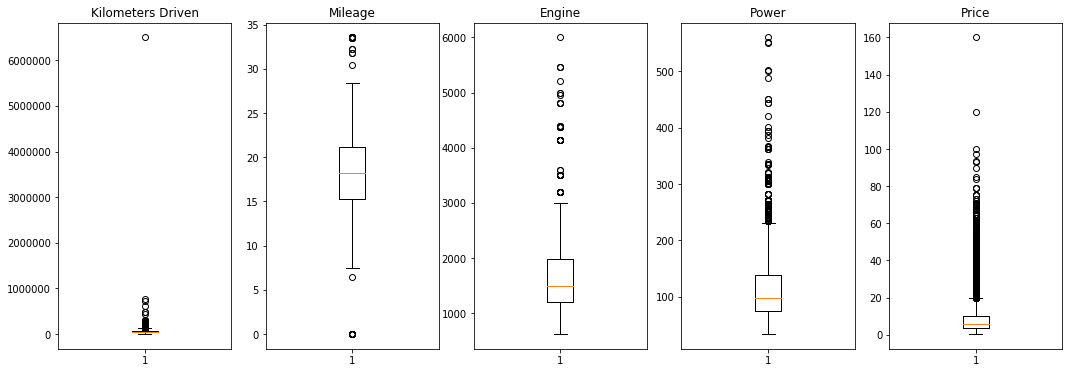

In [31]:
    fig, ax = plt.subplots(1,5, figsize=(18, 6))
    ax[0].boxplot(list(data_clean.Kilometers_Driven))
    ax[0].set_title("Kilometers Driven")

    ax[1].boxplot(data_clean.Mileage)
    ax[1].set_title("Mileage")

    ax[2].boxplot(data_clean.Engine)
    ax[2].set_title("Engine")
    
    ax[3].boxplot(list(data_clean.Power))
    ax[3].set_title("Power")
    
    ax[4].boxplot(list(data_clean.Price))
    ax[4].set_title("Price")
    
    plt.show()

D:\anaconda\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


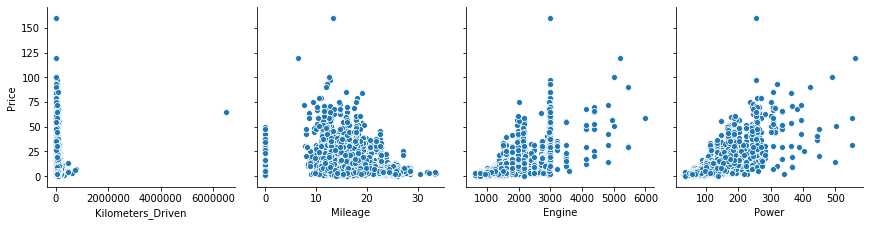

In [32]:
sns.pairplot(data=data_clean, x_vars=['Kilometers_Driven', 'Mileage', 'Engine', 'Power'], y_vars = 'Price', size=3)

There is one noticeable outlier, the one whire Kilimeters Drive is more than 6000000. Let's remove this value from the dataframe.

In [33]:
idx = []
lt = list(data_clean["Kilometers_Driven"])
for i in range(len(lt)):   
    if( lt[i] > 1000000):
        idx.append(i)
data_clean = data_clean.drop(idx)
data_clean = data_clean.reset_index(drop = True)

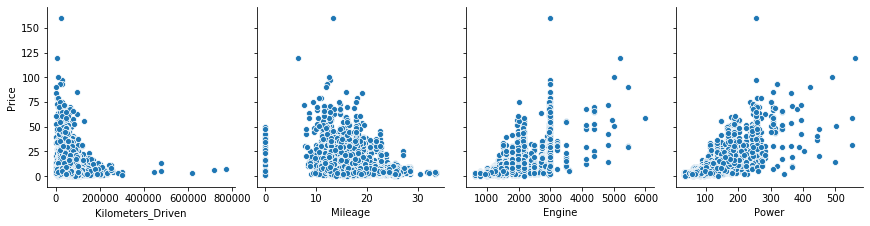

In [34]:
sns.pairplot(data=data_clean, x_vars=['Kilometers_Driven', 'Mileage', 'Engine', 'Power'], y_vars = 'Price', size=3)

Now it seems that there is no more outliers, so we could start creating our model.

# Linear Regression

First, let's create normalized training and test data

In [35]:
y = data_clean[["Price"]].to_numpy()
data_clean = data_clean.drop(columns = ["Price"])

In [36]:
x = data_clean.values
columns = data_clean.columns
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_clean = pd.DataFrame(x_scaled)
data_clean.columns = columns

In [37]:
X = data_clean.to_numpy()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85, test_size=0.15, random_state=1)

Now, let's fit the model and check accuracy on the training data.

In [39]:
lm = LinearRegression(fit_intercept=True, normalize=True, copy_X=True)
lm.fit(X_train, y_train)
print('Training accuracy (the coefficient of determination): {:.3f}'.format(lm.score(X_train, y_train)))

Training accuracy (the coefficient of determination): 0.798


Now we could test the model on the test data.

In [40]:
prediction = lm.predict(X_test)

In [41]:
print('Testing accuracy by using score function: {:.3f}'.format(lm.score(X_test, y_test)))
print('Testing accuracy by using r2_score meric: {:.3f}'.format(r2_score(y_test, lm.predict(X_test))))

Testing accuracy by using score function: 0.792
Testing accuracy by using r2_score meric: 0.792


As you can see, testing accuracy is very similar to training accuracy, so we could say that the model didn't overfit the training data. Let's use a more intuitive metric - mean absolute error - to evaluate the performance of the model.

In [42]:
mean_absolute_error(y_test, prediction)

2.7444627012335903

On average by using linear regression model, it will misprice a car by around 2.74 INR Lakhs.

## Decision Tree

In [56]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
import random
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_prediction = dtr.predict(X_test)
print("Decision Tree")
print(dtr.score(X_test, y_test))

Decision Tree
0.8317435038248504


In [58]:
prediction = dtr.predict(X_test)
mean_absolute_error(y_test, prediction)

2.0896235338630347

On average by using decision tree, it will misprice a car by around 2.08 INR Lakhs.

## Random Forest

In [52]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_prediction = rfr.predict(X_test)
print("Random Forest")
rfr.score(X_test, y_test)

D:\anaconda\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Random Forest


0.9006396188329621

In [59]:
prediction = rfr.predict(X_test)
mean_absolute_error(y_test, prediction)

1.531774722447435

On average by using Random Forest model, it will misprice a car by around 1.53 INR Lakhs.

From the above models,in Random Forest model the mean absolute error prediction is the least so this model performs quiet well ,so it will misprice the car by 1.53 INR Lakhs.

Thank you for reading!